Denoising Auto-Encoder

 * MNIST dataset: https://docs.pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html
 

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


In [2]:
# hyperparameters
num_epochs = 20
learning_rate = 1e-3
batch_size = 64
noise_factor = 0.5


torch.Size([28, 28]) torch.uint8 tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
torch.Size([28, 28]) torch.uint8 tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
torch.Size([28, 28]) torch.uint8 tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
torch.Size([28, 28]) torch.uint8 tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
torch.Size([28, 28]) torch.uint8 tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
torch.Size([28, 28]) torch.uint8 tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
torch.Size([28, 28]) torch.uint8 tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
torch.Size([28, 28]) torch.uint8 tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
torch.Size([28, 28]) torch.uint8 tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
torch.Size([28, 28]) torch.uint8 tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
torch.Size([28, 28]) torch.uint8 tensor(0, dtype=torch.uint8) tensor(2

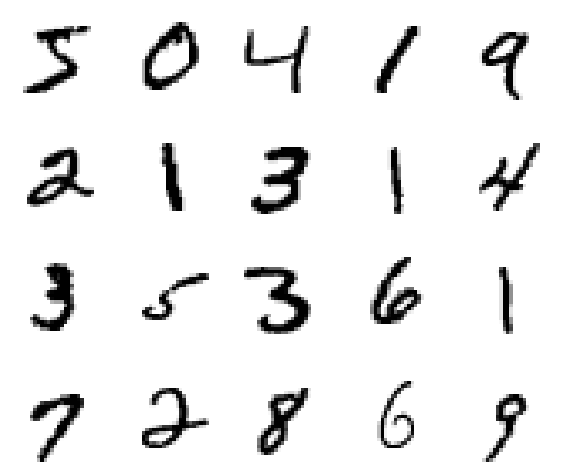

In [3]:
mnist = torchvision.datasets.MNIST(
    root="./data", train=True,
    download=True
)

fig, axes = plt.subplots(4, 5, figsize=(7, 6))
axes = axes.ravel()
for i in range(20):
    print(mnist.data[i].shape, mnist.data[i].dtype, mnist.data[i].min(), mnist.data[i].max())
    axes[i].imshow(mnist.data[i], cmap='gray_r')
    axes[i].axis('off')
plt.show()

In [4]:
# build a convolutional denoising autoencoder
class DenoisingAutoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),  # bx16x14x14
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Conv2d(16, 32, 3, stride=2, padding=1), # bx32x7x7
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 64, 7)                       # bx64x1x1
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),             # bx32x7x7
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), # bx16x14x14
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),  # bx1x28x28
            #nn.Sigmoid()  # to keep the output in the range [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [7]:

def add_noise(
        img, noise_factor=noise_factor,
        clip_min=0., clip_max=1.
    ):
    noisy = img + noise_factor * torch.randn_like(img)
    noisy = torch.clip(noisy, clip_min, clip_max)
    return noisy

transform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize(mean=(0.5,), std=(0.5,)),
    #transforms.Lambda(lambda x: add_noise(x, noise_factor=noise_factor, clip_min=0, clip_max=1.)),
])

# MNIST dataset
train_dataset = datasets.MNIST(
    root='./data', train=True,
    download=True, transform=transform
)
val_dataset = datasets.MNIST(
    root='./data', train=False,
    download=True, transform=transform
)

train_loader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True
)

batch, _ = next(iter(train_loader))
print(batch.shape, batch.dtype, batch.min(), batch.max())

torch.Size([64, 1, 28, 28]) torch.float32 tensor(0.) tensor(1.)


Epoch 1/20: 100%|██████████| 938/938 [00:03<00:00, 311.45it/s]


Epoch [1/20] Loss: 0.1076

Epoch 2/20: 100%|██████████| 938/938 [00:02<00:00, 330.07it/s]


Epoch [2/20] Loss: 0.1108

Epoch 3/20: 100%|██████████| 938/938 [00:02<00:00, 330.88it/s]


Epoch [3/20] Loss: 0.1012

Epoch 4/20: 100%|██████████| 938/938 [00:02<00:00, 330.28it/s]


Epoch [4/20] Loss: 0.0929

Epoch 5/20: 100%|██████████| 938/938 [00:02<00:00, 339.28it/s]


Epoch [5/20] Loss: 0.1001Epoch 5/20 Loss: 0.1001 Val Loss: 0.0927


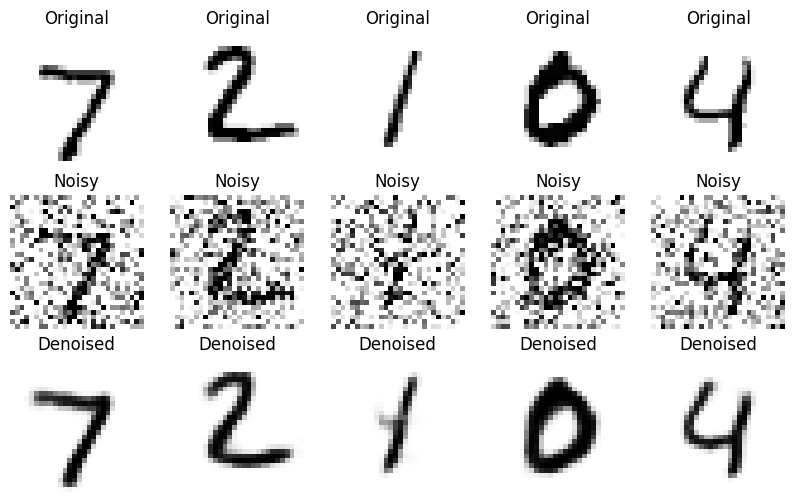

Epoch 6/20: 100%|██████████| 938/938 [00:02<00:00, 329.51it/s]


Epoch [6/20] Loss: 0.0985

Epoch 7/20: 100%|██████████| 938/938 [00:02<00:00, 334.25it/s]


Epoch [7/20] Loss: 0.0994

Epoch 8/20: 100%|██████████| 938/938 [00:02<00:00, 332.41it/s]


Epoch [8/20] Loss: 0.1025

Epoch 9/20: 100%|██████████| 938/938 [00:02<00:00, 332.83it/s]


Epoch [9/20] Loss: 0.0922

Epoch 10/20: 100%|██████████| 938/938 [00:02<00:00, 336.56it/s]


Epoch [10/20] Loss: 0.0991Epoch 10/20 Loss: 0.0991 Val Loss: 0.0911


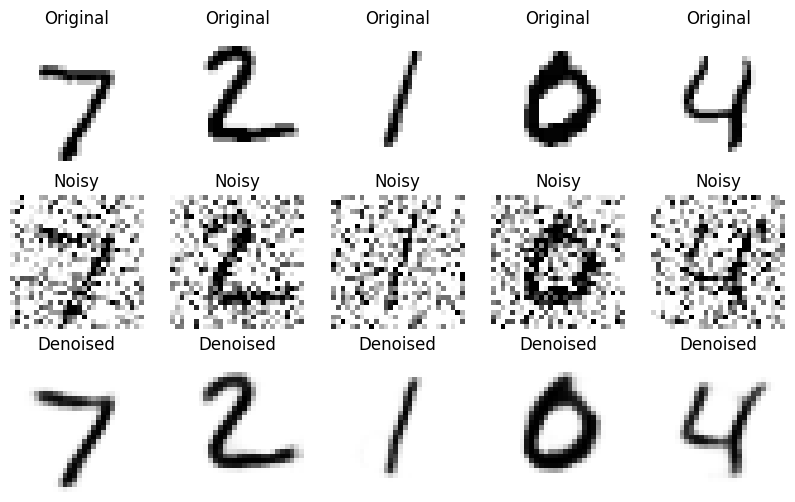

Epoch 11/20: 100%|██████████| 938/938 [00:02<00:00, 336.95it/s]


Epoch [11/20] Loss: 0.0914

Epoch 12/20: 100%|██████████| 938/938 [00:02<00:00, 338.48it/s]


Epoch [12/20] Loss: 0.0977

Epoch 13/20: 100%|██████████| 938/938 [00:02<00:00, 340.15it/s]


Epoch [13/20] Loss: 0.0909

Epoch 14/20: 100%|██████████| 938/938 [00:02<00:00, 337.60it/s]


Epoch [14/20] Loss: 0.0946

Epoch 15/20: 100%|██████████| 938/938 [00:02<00:00, 336.02it/s]


Epoch [15/20] Loss: 0.0951Epoch 15/20 Loss: 0.0951 Val Loss: 0.0887


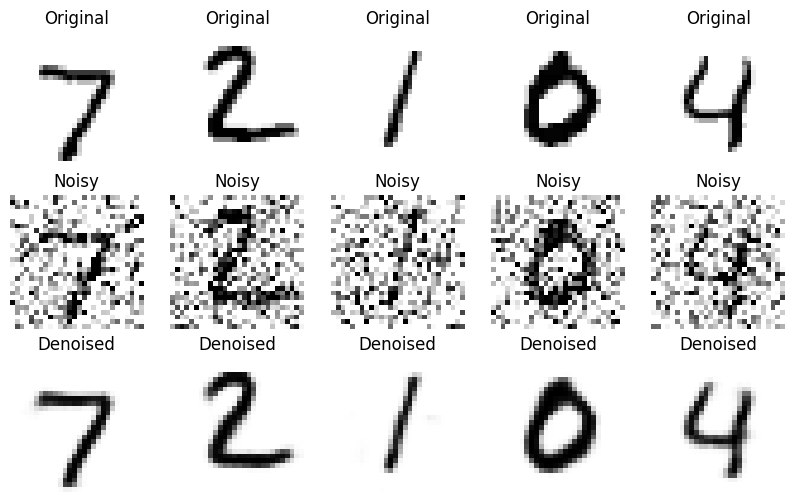

Epoch 16/20: 100%|██████████| 938/938 [00:02<00:00, 336.89it/s]


Epoch [16/20] Loss: 0.0911

Epoch 17/20: 100%|██████████| 938/938 [00:02<00:00, 337.14it/s]


Epoch [17/20] Loss: 0.0905

Epoch 18/20: 100%|██████████| 938/938 [00:02<00:00, 332.74it/s]


Epoch [18/20] Loss: 0.0970

Epoch 19/20: 100%|██████████| 938/938 [00:02<00:00, 337.15it/s]


Epoch [19/20] Loss: 0.0919

Epoch 20/20: 100%|██████████| 938/938 [00:02<00:00, 337.09it/s]


Epoch [20/20] Loss: 0.0958Epoch 20/20 Loss: 0.0958 Val Loss: 0.0882


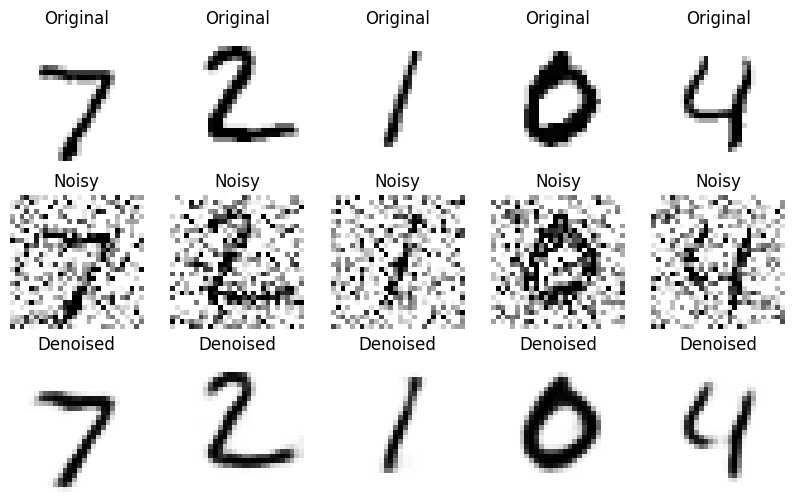

In [6]:
model = DenoisingAutoencoder()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# training loop
for epoch in range(num_epochs):
    pbar = tqdm(
        train_loader,
        desc=f"Epoch {epoch+1}/{num_epochs}",
        leave=True,
        position=0,
        dynamic_ncols=True
    )
    model.train()
    for imgs, _ in pbar:
        imgs = imgs.to(device)
        # forward pass
        noisy_imgs = add_noise(imgs, noise_factor)
        outputs = model(noisy_imgs)
        loss = criterion(outputs, imgs)
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {loss:.4f}", end="")

    if (epoch+1) % 5 == 0:
        # visualize some results
        # evaluate on validation set
        model.eval()
        with torch.no_grad():
            val_imgs, _ = next(iter(DataLoader(val_dataset, batch_size=16)))
            val_imgs = val_imgs.to(device)
            noisy_val_imgs = add_noise(
                val_imgs, noise_factor
            )
            outputs = model(noisy_val_imgs)
            predictions = torch.sigmoid(outputs).cpu().numpy().squeeze()
            val_loss = criterion(outputs, val_imgs)

            print(f"Epoch {epoch+1}/20 Loss: {loss:.4f} Val Loss: {val_loss:.4f}")
            fig, axes = plt.subplots(3, 5, figsize=(10, 6))
            for i in range(5):
                axes[0, i].imshow(val_imgs[i].cpu().squeeze(), cmap='gray_r')
                axes[0, i].set_title('Original')
                axes[0, i].axis('off')
                axes[1, i].imshow(noisy_val_imgs[i].cpu().squeeze(), cmap='gray_r')
                axes[1, i].set_title('Noisy')
                axes[1, i].axis('off')
                axes[2, i].imshow(predictions[i], cmap='gray_r')
                axes[2, i].set_title('Denoised')
                axes[2, i].axis('off')
            plt.show()